In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("C:\\Users\\Jomin\\Machine Learning\\uber request data\\Uber Request Data.csv")

In [4]:
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [5]:
data.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN
6744,6753,Airport,NaN,No Cars Available,15-07-2016 23:55:03,NaN


In [3]:
print(data.shape)

(6745, 6)


In [4]:
data.columns = ['Request_ID','Pickup_Point','Driver_ID','Status','Request_Timestamp','Drop_Timestamp']

In [5]:
data["Request_Timestamp"] = pd.to_datetime(data["Request_Timestamp"])

In [6]:
data["Request_Hour"] = data["Request_Timestamp"].dt.hour

In [7]:
data["Drop_Timestamp"] = pd.to_datetime(data["Drop_Timestamp"])

In [8]:
data["Drop_Hour"] = data["Drop_Timestamp"].dt.hour

In [9]:
data.drop(['Request_Timestamp', 'Drop_Timestamp'], axis='columns', inplace=True)

In [10]:
print(data)

      Request_ID Pickup_Point  Driver_ID             Status  Request_Hour  \
0            619      Airport        1.0     Trip Completed            11   
1            867      Airport        1.0     Trip Completed            17   
2           1807         City        1.0     Trip Completed             9   
3           2532      Airport        1.0     Trip Completed            21   
4           3112         City        1.0     Trip Completed             8   
...          ...          ...        ...                ...           ...   
6740        6745         City        NaN  No Cars Available            23   
6741        6752      Airport        NaN  No Cars Available            23   
6742        6751         City        NaN  No Cars Available            23   
6743        6754         City        NaN  No Cars Available            23   
6744        6753      Airport        NaN  No Cars Available            23   

      Drop_Hour  
0          13.0  
1          18.0  
2           9.0  
3  

In [11]:
cancelled_trips = data[data['Status'] == 'Cancelled']

In [12]:
print(cancelled_trips.shape)

(1264, 6)


In [13]:
no_cars_available = data[data['Status'] == 'No Cars Available']

In [14]:
print(no_cars_available.shape)

(2650, 6)


In [15]:
completed_trips = data[data['Status'] == 'Trip Completed']

In [16]:
print(completed_trips.shape)

(2831, 6)


In [17]:
print(cancelled_trips.value_counts())

Series([], dtype: int64)


In [18]:
y = np.array([1264, 2650, 2831])

In [21]:
statuslabels = ["Cancelled", "No Cars Available", "Trip Completed"]

([<matplotlib.patches.Wedge at 0x199673ba6a0>,
 [Text(0.9148122117335421, 0.6108343615606321, 'Cancelled'),
  Text(-0.8197978372292601, 0.7334381405914392, 'No Cars Available'),
  Text(0.27450168572516787, -1.0651989600699212, 'Trip Completed')],
 [Text(0.49898847912738653, 0.333182379033072, '18.74%'),
  Text(-0.44716245667050547, 0.40005716759533044, '39.29%'),
  Text(0.1497281922137279, -0.5810176145835932, '41.97%')])

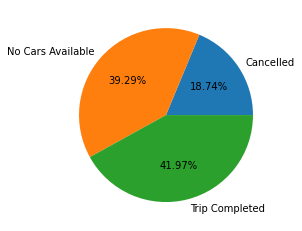

In [22]:
plt.pie(y, labels = statuslabels, autopct = '%2.2f%%')

In [23]:
x = ["Supply", "Demand"]

In [24]:
y = np.array([2831, 6745])

([<matplotlib.patches.Wedge at 0x199674de8b0>,
 [Text(0.6587063113848798, 0.8809687822742223, 'Supply'),
  Text(-0.6587063113848801, -0.8809687822742219, 'Demand')],
 [Text(0.3592943516644798, 0.48052842669503026, '29.56%'),
  Text(-0.35929435166448004, -0.4805284266950301, '70.44%')])

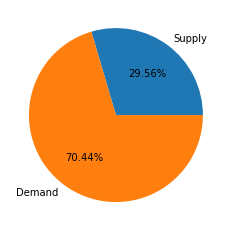

In [25]:
plt.pie(y, labels = x, autopct = '%2.2f%%')

In [26]:
cancelled_hour = cancelled_trips['Request_Hour'].tolist()

In [27]:
notavailable_hour = no_cars_available['Request_Hour'].tolist()

In [28]:
range = (0, 23)

In [29]:
bins = 24

In [30]:
def plots(q):
    plt.hist(q, bins, range, color = 'green', histtype = 'bar', rwidth = 0.8)
    plt.xlabel('Time Slots')
    plt.ylabel("Number of Trips")

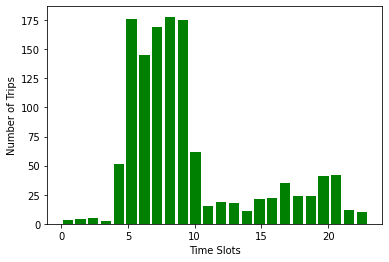

In [31]:
plots(cancelled_hour)

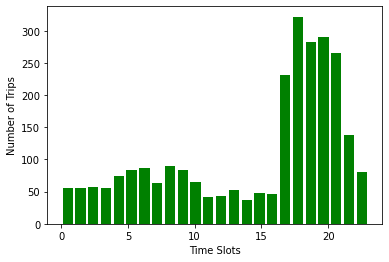

In [32]:
plots(notavailable_hour)

In [33]:
city_to_airport = data[(data.Status != 'Trip Completed') & (data.Pickup_Point == 'City')]

In [34]:
print(city_to_airport.shape)

(2003, 6)


In [35]:
airport_to_city = data[(data.Status != 'Trip Completed') & (data.Pickup_Point == 'Airport')]

In [36]:
print(airport_to_city.shape)

(1911, 6)


In [37]:
p = ["Failed Trips from Airport to City", "Failed Trips from City to Airport"]

In [38]:
q = np.array([1911, 2003])

([<matplotlib.patches.Wedge at 0x19968696430>,
 [Text(0.04060517048133803, 1.0992502991267192, 'Failed Trips from Airport to City'),
  Text(-0.04060527340057912, -1.0992502953249839, 'Failed Trips from City to Airport')],
 [Text(0.022148274808002556, 0.5995910722509377, '48.82%'),
  Text(-0.022148330945770428, -0.5995910701772639, '51.18%')])

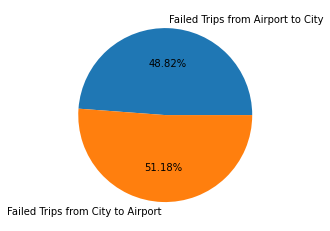

In [42]:
plt.pie(q, labels = p, autopct = '%2.2f%%')

In [44]:
city_to_airport_cancelled = data[(data.Status == 'Cancelled') & (data.Pickup_Point == 'City')]

In [45]:
city_to_airport_not_available = data[(data.Status == 'No Cars Available') & (data.Pickup_Point == 'City')]

In [46]:
airport_to_city_cancelled = data[(data.Status == 'Cancelled') & (data.Pickup_Point == 'Airport')]

In [47]:
airport_to_city_not_available = data[(data.Status == 'No Cars Available') & (data.Pickup_Point == 'Airport')]

In [48]:
city_to_airport_cancelled_hour = city_to_airport_cancelled['Request_Hour'].tolist()

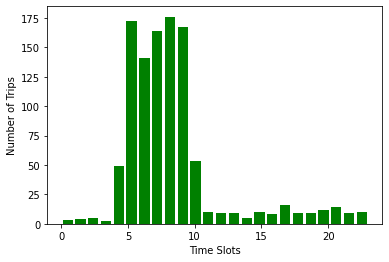

In [49]:
plots(city_to_airport_cancelled_hour)

In [50]:
city_to_airport_not_available_hour = city_to_airport_not_available['Request_Hour'].tolist()

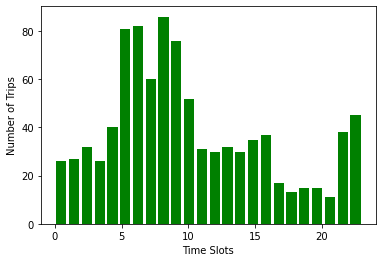

In [51]:
plots(city_to_airport_not_available_hour)

In [52]:
airport_to_city_cancelled_hour = airport_to_city_cancelled['Request_Hour'].tolist()

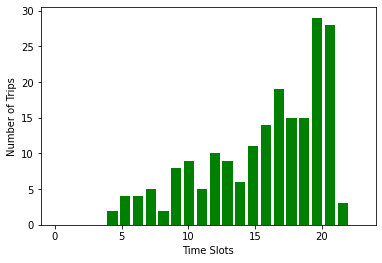

In [53]:
plots(airport_to_city_cancelled_hour)

In [54]:
airport_to_city_not_available_hour = airport_to_city_not_available['Request_Hour'].tolist()

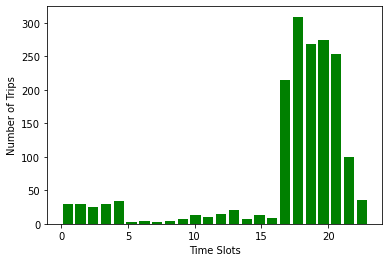

In [55]:
plots(airport_to_city_not_available_hour)

In [57]:
##conclusion
##1. Heavy demand in the city from 4 AM to 11 PM add Codeadd Markdown
##2. Heavy demand at the airport from 5 PM to 11 PM
